In [1]:
import os
import tqdm

%matplotlib widget
import matplotlib
import matplotlib.pyplot

import datetime
import pytz

import pandas
import numpy
import pickle

import scipy

import accels_utils.frame_accels as FA

In [2]:
# Processing initialization
DATA_RECALCULATION = False
COMB = '3.2.10'
root_path   = '/Users/matthieu/Documents/proto3/measurements_calib/data/' + COMB + '/'

F_ACQ = 1600

data_path_indiv_fm  = root_path + 'indiv/'
data_path_global_fm = root_path + '1600/'

ACC_NUMBER  = 10
AXIS        = ['X', 'Y', 'Z']

month       = '10'
day         = '03'

data_path_wax_only  = data_path_indiv_fm + month + '/' + day + '/' + 'wax_only/'
data_path_water     = data_path_indiv_fm + month + '/' + day + '/' + 'wax_water/'
data_path_naked     = data_path_global_fm + '03/28/'

proc_path           = root_path + 'processed_data/' + month + '/' + day + '/'

if not(os.path.isdir(proc_path)):
    os.makedirs(proc_path, exist_ok=True)

In [3]:
# Files list for the different configs
N_FILES_EXPECTED = 10

# Naked comb config
files_list_naked = sorted([data_path_naked+x for x in os.listdir(data_path_naked) if x.startswith('r0') and x.endswith('.txt')])
print('Discovered {} files for naked comb experiment (expected {})'.format(len(files_list_naked), N_FILES_EXPECTED))

# Wax only config
files_list_wax_only = sorted([data_path_wax_only+x for x in os.listdir(data_path_wax_only) if x.startswith('r0') and x.endswith('.txt')])
print('Discovered {} files for naked comb experiment (expected {})'.format(len(files_list_naked), N_FILES_EXPECTED))

# Wax with water config
exp_water_list = sorted([data_path_water+x+'/' for x in os.listdir(data_path_water) if os.path.isdir(data_path_water + x)])
nb_water_config = len(exp_water_list)
files_list_water = []
_ = [files_list_water.append([exp_water + x for x in os.listdir(exp_water)]) for exp_water in exp_water_list]
print('Discovered {} files for the different water configs (expected {})'.format(len([item for sublist in files_list_water for item in sublist]), N_FILES_EXPECTED*nb_water_config))

Discovered 10 files for naked comb experiment (expected 10)
Discovered 10 files for naked comb experiment (expected 10)
Discovered 80 files for the different water configs (expected 80)


In [4]:
# first naive plot
exp_configs = {
    'names':['full region 4', '1/2 region 4', '1/4 region 4', 'full connexion 3-4', 'full connexion 2-3-4-5', '3/4 connexion 2-3-4-5', '1/2 connexion 2-3-4-5', '1/4 connexion 2-3-4-5'], #, 'naked', 'wax only'],
    'files':[x for x in files_list_water] # + files_list_naked, files_list_wax_only],
}
frequencies = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
frequency_configs = {
    'names':[str(x) for x in frequencies],
    'frequency':frequencies
}

if DATA_RECALCULATION : 
    # Data extraction : taking around 25 minutes
    data = {'filenames':[], 'data':[], 'frequency':[], 'water_config':[]}
    for exp_i, exp_name in enumerate(exp_configs['names']):
        for freq_i, freq_name in enumerate(frequency_configs['names']):
            try:
                data_file = [f for f in exp_configs['files'][exp_i] if f.split('_')[-3].endswith(freq_name)][0]
                with open(data_file) as accfile:
                    dat = accfile.readlines()
                data['filenames'].append(data_file)
                data['data'].append(FA.extract_data(dat))
                data['frequency'].append(frequency_configs['frequency'][freq_i])
                data['water_config'].append(exp_name)
            except : 
                print('There was a problem reading file {}'.format(data_file))

    with open(proc_path + 'saved_accs_water.json', 'wb') as fp:
        pickle.dump(data, fp)
else :
    with open(proc_path + 'saved_accs_water.json', 'rb') as fp:
        data = pickle.load(fp)

# fig, ax = matplotlib.pyplot.subplots(len(x_axis['names']), len(x_axis['names']), figsize=(15,15))
# for y_i, y_name in enumerate(y_axis['names']):
#     for x_i, x_name in enumerate(x_axis['names']):

#         ax[y_i, x_i].plot()


In [5]:
len(data['data'][0])
data['data'][0]

{1: {'X': {'val': [0.1695,
    0.1497,
    0.1132,
    0.1239,
    0.1317,
    0.115,
    0.1186,
    0.1186,
    0.1221,
    0.1204,
    0.1359,
    0.1311,
    0.097,
    0.1024,
    0.1299,
    0.1317,
    0.1329,
    0.1317,
    0.1156,
    0.1012,
    0.1024,
    0.1138,
    0.1251,
    0.1389,
    0.1317,
    0.1192,
    0.1305,
    0.1575,
    0.1611,
    0.1509,
    0.103,
    0.0796,
    0.1102,
    0.0605,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.1096,
    0.097,
    0.0904,
    0.112,
    0.1227,
    0.1132,
    0.1251,
    0.1144,
    0.0976,
    0.0952,
    0.0928,
    0.1239,
    0.1371,
    0.1257,
    0.1281,
    0.1401,
    0.1551,
    0.1521,
    0.121,
    0.0832,
    0.0814,
    0.1239,
    0.1365,
    0.1275,
    0.1365,
    0.1443,
    0.1431,
    0.1263,
    0.1341,
    0.1269,
    0.0988,
    0.1102,
    0.1227,
    0.1126,
    0.1168,
    0.1317,
    0.1437,
    0.1437,
    0.1162,
    0.094,
    0

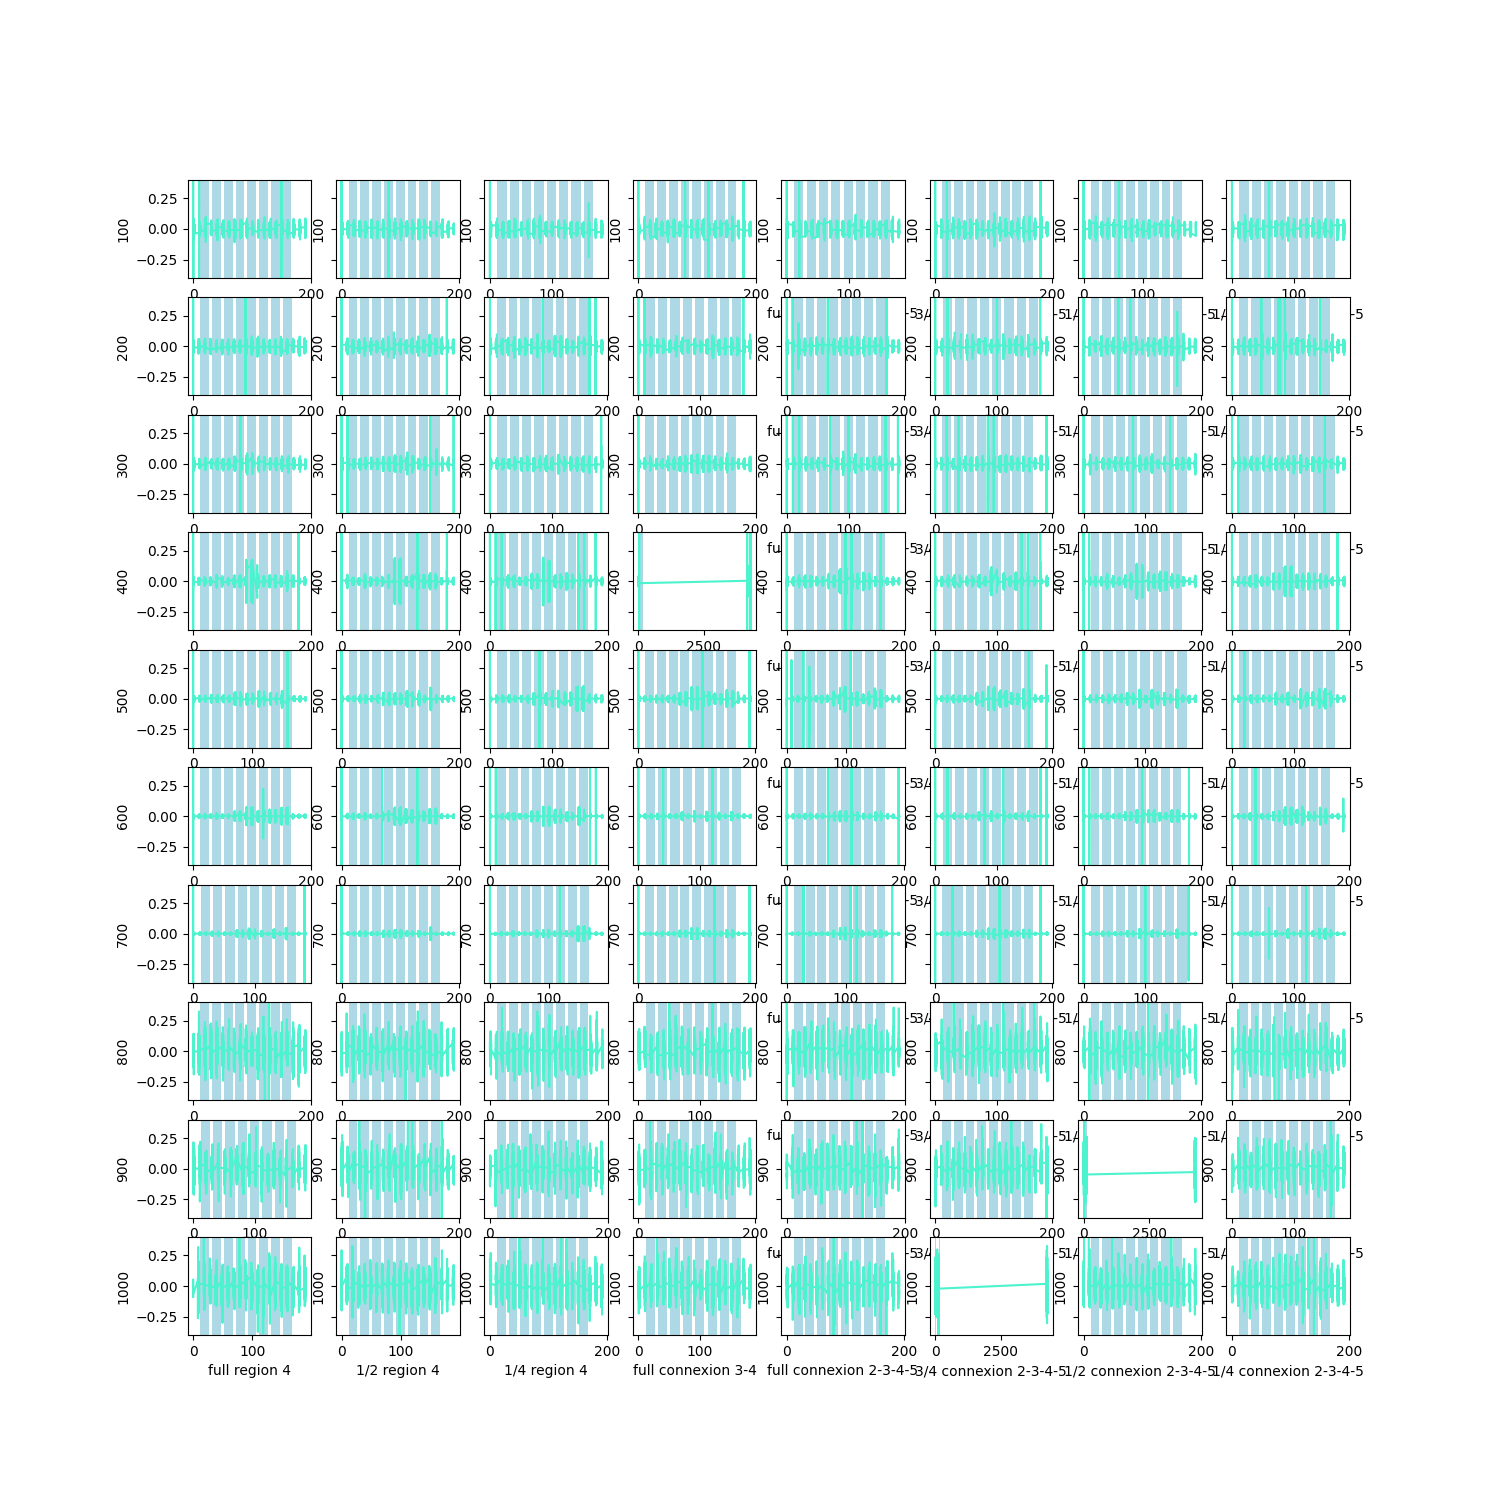

In [6]:
# Plots of water experiment
# print(data['frequency'])
# print(data['water_config'])

vib_sig = (numpy.array([0]*12*F_ACQ + ([1]*15*F_ACQ + [0]*5*F_ACQ)*8)-9.81)
vib_tim = numpy.array(range(len(vib_sig)))/F_ACQ

cmap = matplotlib.cm.get_cmap('rainbow')

size_freq = len(frequency_configs['frequency'])
size_conf = len(exp_configs['names'])

fig, ax = matplotlib.pyplot.subplots(size_freq, size_conf, figsize=(15,15), sharey=True)
for exp_i, exp_fn in enumerate(data['filenames']):
    i_plot = frequency_configs['frequency'].index(data['frequency'][exp_i])
    j_plot = exp_configs['names'].index(data['water_config'][exp_i])
    min_time = numpy.inf
    for acc in range(4, 5):
        tims = numpy.array(data['data'][exp_i][acc]['Z']['t'])/1000
        vals = data['data'][exp_i][acc]['Z']['val']
        min_time = min(numpy.min(tims), min_time)
        sig = numpy.array([[tims[i], vals[i]] for i in range(len(vals)) if not(vals[i]==0.0)])
        if data['frequency'][exp_i]<800:
            ax[i_plot, j_plot].plot(sig[:,0]-min_time, FA.butter_passband_filter(sig[:,1], data['frequency'][exp_i]-50, data['frequency'][exp_i]+50, F_ACQ), c=cmap(float(acc)/ACC_NUMBER))
            ax[i_plot, j_plot].set_ylim([-0.4, 0.4])
        else :
            ax[i_plot, j_plot].plot(sig[:,0]-min_time, sig[:,1]-numpy.mean(sig[:,1]), c=cmap(float(acc)/ACC_NUMBER))
    for act_i in range(8):
        ax[i_plot, j_plot].axvspan(12+act_i*20, 12+15+act_i*20, facecolor='lightblue')
    ax[i_plot, j_plot].set_ylabel(str(data['frequency'][exp_i]))
    ax[i_plot, j_plot].set_xlabel(str(data['water_config'][exp_i]))

In [7]:
exp_configs['files'][0]

['/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f800_s16_b10.txt',
 '/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f100_s16_b10.txt',
 '/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f500_s16_b10.txt',
 '/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f200_s16_b10.txt',
 '/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f600_s16_b10.txt',
 '/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f1000_s16_b10.txt',
 '/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f700_s16_b10.txt',
 '/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f300_s16_b10.txt',
 '/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/1/r0_f400_s16_b

In [8]:
print(data['filenames'].index('/Users/matthieu/Documents/proto3/measurements_calib/data/3.2.10/indiv/10/03/wax_water/5/r0_f1000_s16_b10.txt'))

49


191855.5


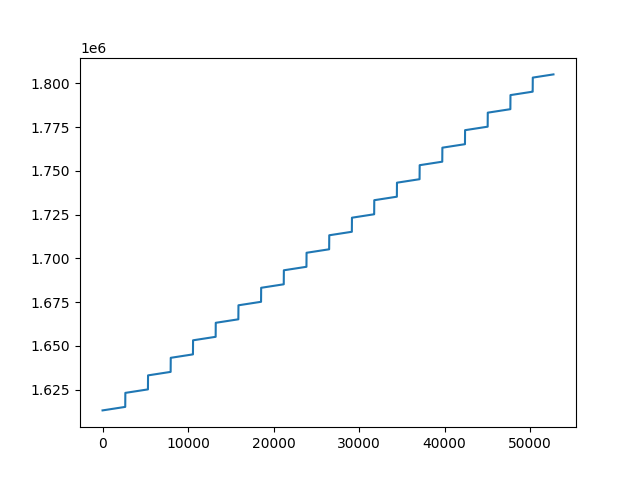

In [9]:
# 15:50:09.037050 - 15:53:29.055110 = 3min20s = 200s = 20 tours de tous les accs 
print(data['data'][49][4]['Z']['t'][-1]-data['data'][49][4]['Z']['t'][0])
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(range(len(data['data'][49][4]['Z']['t'])), data['data'][49][4]['Z']['t'])

In [10]:
# Data extraction : taking 4 mins for 144 files (1 regular day)
# data = {}
# for fname_i, fname in enumerate(files_list):
#     try:
#         with open(data_path + fname) as accfile:
#             dat = accfile.readlines()
#         data[fname_i] = {}
#         data[fname_i]['data'] = FA.extract_data(dat)
#         data[fname_i]['ts']  = datetime.datetime.strptime(fname.split('.')[0].split('_')[-1][2:-3], '%y-%m-%dT%H%M%S')
#     except : 
#         print('There was a problem reading file {}'.format(fname))
    
    # if fname_i > 50:
    #     break

In [11]:
# energies = []
# for rec in data.keys():
#     energy = {}
#     energy['ts'] = data[rec]['ts']
#     for acc in data[rec]['data'].keys():
#         if acc in range(1,ACC_NUMBER+1):
#             for axis in data[rec]['data'][acc].keys():
#                 signal = numpy.array(data[rec]['data'][acc][axis]['val'])
#                 filtered_signal = FA.butter_lowpass_filter(signal, 5, 1600)
#                 energy[str(acc)+axis] = numpy.mean(numpy.power(filtered_signal, 2))
#     energies.append(energy)
# energies = pandas.DataFrame.from_dict(energies)

In [12]:
# cmap = matplotlib.cm.get_cmap('rainbow')

# fig, ax = matplotlib.pyplot.subplots(len(AXIS), 1, figsize=(13,7), sharex=True)
# for axis_id, axis in enumerate(AXIS):
#     for acc in range(1, ACC_NUMBER+1):
#         ax[axis_id].plot(energies.ts, scipy.signal.medfilt(energies[str(acc)+axis], 5), c=cmap(float(acc)/ACC_NUMBER), label=str(acc)+axis)
#     ax[axis_id].grid()
# ax[0].legend()

# matplotlib.pyplot.gcf().autofmt_xdate()
# fig.tight_layout()